# 자연어 처리

In [66]:
from konlpy.tag import Kkma
from konlpy.utils import pprint

kkma = Kkma() # 꼬꼬마
pprint(kkma.sentences(u'네, 안녕하세요. 반갑습니다.'))

['네, 안녕하세요.', '반갑습니다.']


## 1.토크나이징

In [67]:
from konlpy.tag import Kkma # 세종연구원

kkma = Kkma()


text = "분명 배달이 완료되었는데 나는 받지 않았어ㅋㅋㅋㅋㅋㅋㅋㅎㅎㅎㅎㅎㅎ"
result = kkma.pos(text)

for res in result:
    print(res)

('분명', 'MAG')
('배달', 'NNG')
('이', 'JKS')
('완료', 'NNG')
('되', 'XSV')
('었', 'EPT')
('는데', 'ECD')
('나', 'NP')
('는', 'JX')
('받', 'VV')
('지', 'ECD')
('않', 'VXV')
('았', 'EPT')
('어', 'EFN')
('ㅋㅋㅋㅋㅋㅋㅋㅎㅎㅎㅎㅎㅎ', 'EMO')


In [68]:
from konlpy.tag import Okt # 트위터

okt = Okt()

text = "분명 배달이 완료되었는데 나는 받지 않았어"
result = okt.pos(text) # (단어, 품사) 로 출력

for res in result:
    print(res)

('분명', 'Noun')
('배달', 'Noun')
('이', 'Josa')
('완료', 'Noun')
('되었는데', 'Verb')
('나', 'Noun')
('는', 'Josa')
('받지', 'Verb')
('않았어', 'Verb')


In [69]:
from konlpy.tag import Okt # 트위터

okt = Okt()

text = "분명 배달이 완료되었는데 나는 받지 않았어"
result = okt.morphs(text) # 끊어진 단어들만 출력

for res in result:
    print(res)

분명
배달
이
완료
되었는데
나
는
받지
않았어


In [70]:
from konlpy.tag import Okt # 트위터

okt = Okt()

text = "분명 배달이 완료되었는데 나는 받지 않았어"
result = okt.nouns(text) # 끊어진 단어들 중 명사만 출력

for res in result:
    print(res)

분명
배달
완료
나


In [71]:
text1 = "나는 밥 먹었엌ㅋㅋㅋㅋ"
text2 = "나는 밥 먹었다"

result1 = okt.pos(text1)
result2 = okt.pos(text1, norm = True)
result3 = okt.pos(text2, stem = True)

print(result1)
print(result2)
print(result3)

[('나', 'Noun'), ('는', 'Josa'), ('밥', 'Noun'), ('먹었엌', 'Noun'), ('ㅋㅋㅋㅋ', 'KoreanParticle')]
[('나', 'Noun'), ('는', 'Josa'), ('밥', 'Noun'), ('먹었어', 'Verb'), ('ㅋㅋㅋ', 'KoreanParticle')]
[('나', 'Noun'), ('는', 'Josa'), ('밥', 'Noun'), ('먹다', 'Verb')]


### 1) 데이터 불러오기

In [72]:
import pandas as pd

data = pd.read_csv("data/배달의민족댓글.csv", index_col=0)
data.head()

,댓글
0,NaN
1,NaN
2,NaN
3,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
4,음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...


In [73]:
# 결측치가 있음
data.isna().sum()

댓글    3
dtype: int64

In [74]:
# 결측치 제거 방법 1
data1 = pd.read_csv("data/배달의민족댓글.csv", index_col=0, skiprows=4, names = ["댓글"])
data1 = data1.reset_index(drop= True)
data1.head()

,댓글
0,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
1,음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...
2,왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 ...
3,"배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는..."
4,장바구니가 너무 불편합니다. 비마트에서 여러가지를 담고 스크롤 올리고 내릴때 살짝 ...


In [75]:
# 결측치 제거 방법 2
import pandas as pd

data1 = pd.read_csv("data/배달의민족댓글.csv", index_col=0)
data1 = data1.dropna()

data1 = data1.reset_index(drop= True)
data1.head()

,댓글
0,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
1,음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...
2,왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 ...
3,"배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는..."
4,장바구니가 너무 불편합니다. 비마트에서 여러가지를 담고 스크롤 올리고 내릴때 살짝 ...


In [76]:
# 정제된 데이터 재저장
data1.to_csv("data/배달의민족댓글_정제.csv")

In [77]:
data = pd.read_csv("data/배달의민족댓글_정제.csv", index_col=0)
data.head()

,댓글
0,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
1,음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...
2,왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 ...
3,"배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는..."
4,장바구니가 너무 불편합니다. 비마트에서 여러가지를 담고 스크롤 올리고 내릴때 살짝 ...


In [78]:
# 첫번째 데이터 댓글을 형태소 분석기로 쪼개보기
from konlpy.tag import Okt # 트위터

okt = Okt()

text = data.iloc[0].values[0]
result = okt.pos(text) # 끊어진 단어들만 출력

print(result)

[('80분', 'Number'), ('걸린다길래', 'Verb'), ('주문', 'Noun'), ('취소', 'Noun'), ('하려고', 'Verb'), ('주', 'Modifier'), ('문', 'Modifier'), ('내', 'Modifier'), ('역', 'Noun'), ('에', 'Josa'), ('들어가면', 'Verb'), ('계속', 'Noun'), ('최신', 'Noun'), ('정보', 'Noun'), ('를', 'Josa'), ('불러오지', 'Verb'), ('못', 'VerbPrefix'), ('했다고만', 'Verb'), ('로딩', 'Noun'), ('반복', 'Noun'), ('.', 'Punctuation'), ('로딩', 'Noun'), ('이미지', 'Noun'), ('는', 'Josa'), ('깨져서', 'Verb'), ('나오고', 'Verb'), ('안정', 'Noun'), ('적', 'Suffix'), ('인', 'Josa'), ('네트워크', 'Noun'), ('상황', 'Noun'), ('하', 'Noun'), ('에서', 'Josa'), ('새로고침', 'Noun'), ('을', 'Josa'), ('눌러도', 'Verb'), ('무한', 'Noun'), ('로딩', 'Noun'), ('이고', 'Josa'), ('심지어', 'Noun'), ('지금', 'Noun'), ('진행중', 'Noun'), ('인', 'Josa'), ('주', 'Modifier'), ('문', 'Modifier'), ('내', 'Modifier'), ('역', 'Noun'), ('정보', 'Noun'), ('조차', 'Josa'), ('정확하지', 'Adjective'), ('않음', 'Verb'), ('.', 'Punctuation'), ('코로나', 'Noun'), ('때문', 'Noun'), ('에', 'Josa'), ('서버', 'Noun'), ('가', 'Josa'), ('불안정한', 'Adjective'), ('건지', '

#### 특정 품사 단어들 모으기

In [79]:
# 처음부터 5개의 데이터 댓글을 추출해서 반복문으로 형태소 분석기로 쪼개기
from konlpy.tag import Okt # 트위터

okt = Okt()

review_five = data["댓글"][:5]

noun_review = []
for index, review in enumerate(review_five):
    result = okt.pos(review)
    temp_list = []

    for word, pos in result:
        if pos == "Noun":
            temp_list.append(word)

    noun_review.append(temp_list)

    print(f"{index}번째 형태소 Noun 결과: {temp_list}")

print(noun_review)

0번째 형태소 Noun 결과: ['주문', '취소', '역', '계속', '최신', '정보', '로딩', '반복', '로딩', '이미지', '안정', '네트워크', '상황', '하', '새로고침', '무한', '로딩', '심지어', '지금', '진행중', '역', '정보', '코로나', '때문', '서버', '뭔', '취소', '못', '꼼짝']
1번째 형태소 Noun 결과: ['음식', '하나', '우리나라', '앱', '국내', '번호', '번호', '인증', '필수', '카드', '결제', '선택', '시', '또', '다른', '은행', '앱', '인증', '번', '정도', '더', '함', '해외', '카드', '결제', '수단', '아예', '왜', '현금', '결제', '옵션', '음식', '하나', '나라', '우리나라', '밖', '강국', '무슨', '왜', '핸드폰', '번호', '인증', '카드', '인증', '등', '스탭', '앱', '사용', '쪽', '저녁', '먹음', '외국', '거주', '방법', '왜', '해외', '카드', '결제']
2번째 형태소 Noun 결과: ['왜', '업데이트', '때', '사용', '점점', '클릭', '한번', '더', '고', '더', '결제', '임', '저쪽', '구석', '마치', '집', '배달', '유도', '듯', '메인', '잘못', '클릭', '자꾸', '결제', '다시', '클릭', '젠', '결제', '창', '요청', '사항', '리뷰', '이벤트', '때', '또', '클릭', '짓', '정말', '배민']
3번째 형태소 Noun 결과: ['배달', '민족', '앱', '자체', '식사', '후', '맛', '리뷰', '평점', '자체', '클린', '식당', '입장', '업주', '입장', '점', '문건', '수', '주문', '입장', '맛', '식당', '체적', '점', '맛집', '탐색', '점', '앱', '자체', '대한', '평점', '점', '식사', 

### 2) 데이터 전처리

#### 정규표현식을 이용한 전처리

In [80]:
text = "오늘!!!!!!! ㅇㅇ너무 ㅓ ㅣㅜ hello HELLO 010-8286-2234 기분좋아^^ ㅎㅇㅎㅇ"

import re

# new_text = re.sub("[^0-9a-zA-Z가-힣\s+-]", "", text)
new_text = re.sub("[^0-9a-zA-Z가-힣ㄱ-ㅎㅏ-ㅣ]", "", text)
# new_text = re.sub("[0-9]", "", text)
print(new_text)

오늘ㅇㅇ너무ㅓㅣㅜhelloHELLO01082862234기분좋아ㅎㅇㅎㅇ


## 2. 빈도 분석

In [81]:
# 데이터의 모든 댓글에 대한 noun 품사를 가진 단어들을 word_list 에 담기
# 조건1: 전처리 과정(특수문자, 자음, 모음 없애기)
# 조건2: 불용어 제거 (stopwords)
# 조건3: 한 글자인 단어 제거

word_list = []
stopwords = ["배민", "민족", "배달", "주문", "가게", "메뉴"]

for i, review in enumerate(data["댓글"].tolist()):
    # 1. 전처리 : 정규표현식 사용
    new_review = re.sub("[^0-9a-zA-Z가-힣\\s]", "", review)
    
    # 2. 토크나이징
    result = okt.nouns(new_review)

    for word in result:
        # 3. 불용어 제거
        if len(word) == 1 or word in stopwords:
            continue

        word_list.append(word)
    print(f"{i}번째 리뷰 : {result}")
    
print(word_list)


0번째 리뷰 : ['주문', '취소', '역', '계속', '최신', '정보', '로딩', '반복', '로딩', '이미지', '안정', '네트워크', '상황', '하', '새로고침', '무한', '로딩', '심지어', '지금', '진행중', '역', '정보', '코로나', '때문', '서버', '뭔', '취소', '못', '꼼짝']
1번째 리뷰 : ['음식', '하나', '우리나라', '앱', '국내', '번호', '번호', '인증', '필수', '카드', '결제', '선택', '시', '또', '다른', '은행', '앱', '인증', '번', '정도', '더', '함', '해외', '카드', '결제', '수단', '아예', '왜', '현금', '결제', '옵션', '음식', '하나', '나라', '우리나라', '밖', '강국', '무슨', '왜', '핸드폰', '번호', '인증', '카드', '인증', '등', '스탭', '앱', '사용', '쪽', '저녁', '먹음', '외국', '거주', '방법', '왜', '해외', '카드', '결제']
2번째 리뷰 : ['왜', '업데이트', '때', '사용', '점점', '클릭', '한번', '더', '고', '더', '결제', '임', '저쪽', '구석', '마치', '집', '배달', '유도', '듯', '메인', '잘못', '클릭', '자꾸', '결제', '다시', '클릭', '젠', '결제', '창', '요청', '사항', '리뷰', '이벤트', '때', '또', '클릭', '짓', '정말', '배민']
3번째 리뷰 : ['배달', '민족', '앱', '자체', '식사', '후', '맛', '리뷰', '평점', '자체', '클린', '식당', '입장', '업주', '입장', '점', '문건', '수', '주문', '입장', '맛', '식당', '체적', '점', '맛집', '탐색', '점', '앱', '자체', '대한', '평점', '점', '식사', '항상', '추구', '평점', '속', '생각', '수고

In [82]:
from collections import Counter

# 4. 단어 빈도 수 계산
# dictionay 형태로 { key : int }
word_counts = Counter(word_list)
print(word_counts)

# 빈도수가 높은 상위 N개 가져오기 [( key , int)]
print(word_counts.most_common(30))

# 너무 갯수가 적은 단어는 빼기
word_count_max = Counter({k:v for k, v in word_counts.items() if v >= 3})
print(word_count_max)

Counter({'시간': 124, '기능': 109, '고객': 107, '리뷰': 105, '사용': 101, '취소': 99, '음식': 99, '결제': 95, '어플': 92, '전화': 79, '검색': 77, '센터': 77, '다른': 71, '업데이트': 68, '이용': 67, '연결': 66, '쿠폰': 66, '계속': 61, '문제': 57, '다시': 55, '그냥': 55, '선택': 50, '진짜': 50, '생각': 49, '상담': 49, '하나': 47, '화면': 46, '확인': 46, '추가': 45, '요청': 43, '개선': 43, '매장': 42, '설정': 41, '기본': 39, '경우': 39, '식당': 38, '사항': 37, '사람': 37, '배차': 36, '삭제': 34, '라이더': 34, '서비스': 34, '포장': 33, '채팅': 33, '사진': 33, '기사': 32, '정말': 31, '지연': 31, '연락': 31, '알뜰': 30, '시스템': 30, '직접': 29, '할인': 29, '지도': 29, '버튼': 28, '문의': 28, '처음': 28, '음식점': 28, '사용자': 27, '정도': 26, '한번': 26, '자체': 26, '해도': 26, '이상': 26, '별로': 26, '위치': 25, '목록': 25, '무슨': 24, '부분': 24, '이유': 24, '바로': 24, '로그인': 24, '입력': 24, '때문': 23, '항상': 23, '자주': 23, '답변': 23, '이제': 23, '광고': 23, '혜택': 23, '이번': 23, '보고': 23, '가지': 22, '주소': 22, '전체': 21, '이해': 21, '표시': 21, '사장': 21, '운영': 21, '오류': 21, '정보': 20, '카드': 20, '장바구니': 20, '체크': 20, '보기': 20, '예상': 20, '수수료': 20, '찾기':

In [83]:
# 한글 폰트 가져오기
from matplotlib import font_manager

search_font = "gothic"

for font in font_manager.findSystemFonts():
    font_info = font_manager.FontProperties(fname = font)
    font_name = font_info.get_name()
    font_path = font_info.get_file()
    if search_font in font_name.lower():
        print(font_name, font_path)

HYGothic-Extra C:\Windows\Fonts\H2GTRE.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\Windows\Fonts\framd.ttf
Franklin Gothic Demi C:\Windows\Fonts\FRADMIT.TTF
Yu Gothic C:\Windows\Fonts\YuGothR.ttc
NanumGothic C:\Windows\Fonts\BOLD.TTF
MS Gothic C:\Windows\Fonts\msgothic.ttc
Franklin Gothic Demi C:\Windows\Fonts\FRADM.TTF
NanumGothic C:\Windows\Fonts\EXTRABOLD.TTF
Franklin Gothic Medium Cond C:\Windows\Fonts\FRAMDCN.TTF
Franklin Gothic Heavy C:\Windows\Fonts\FRAHVIT.TTF
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Franklin Gothic Book C:\Windows\Fonts\FRABKIT.TTF
HYGothic-Medium C:\Windows\Fonts\H2GTRM.TTF
Malgun Gothic C:\Windows\Fonts\malgunsl.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
NanumGothic C:\Windows\Fonts\.TTF
Century Gothic C:\Windows\Fonts\GOTHICBI.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\Windows\Fonts\YuGothB.ttc
Franklin Gothic Book C:\Windows\Fonts\FRABK.TTF
Malgun Gothic C:\Windows\Fonts\malgun.ttf
Franklin Gothic M

### 워드 클라우드

워드 클라우드 설치

`uv add WordCloud`

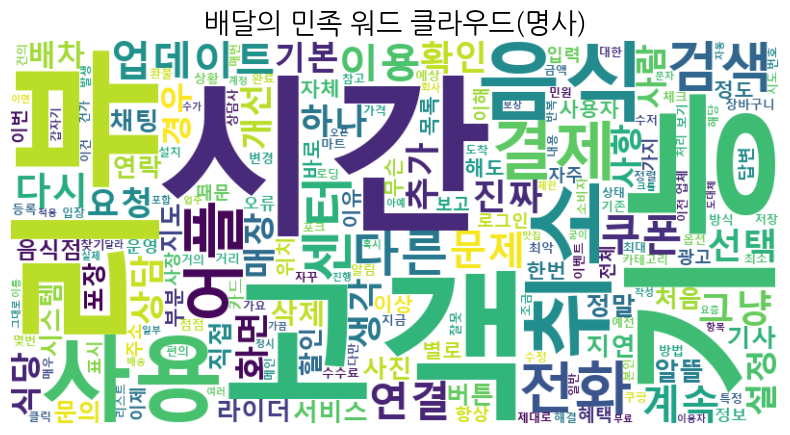

In [84]:
from wordcloud import WordCloud
import koreanize_matplotlib

import matplotlib.pyplot as plt
# 이미 만들어진 단어 빈도수 딕셔너리 (Counter 객체)
# 예시: counter => Counter({'밥': 10, '국': 7, '김치': 5})

# 여기서는 counter가 준비되었다고 가정
# 워드클라우드 객체 생성
wc = WordCloud(
font_path='C:\\Windows\\Fonts\\malgunbd.ttf', # 한글 폰트 경로 (없으면 깨짐)
background_color='white',
width=800,
height=400
)

# 빈도수 기반으로 워드클라우드 생성
wc.generate_from_frequencies(word_count_max)

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("배달의 민족 워드 클라우드(명사)", fontsize=20)
plt.show()

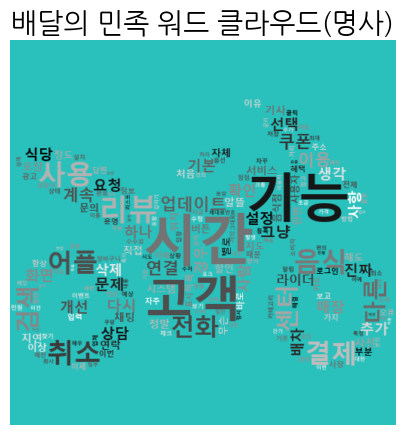

In [85]:
from wordcloud import WordCloud
import koreanize_matplotlib

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# 마스크 만들기
icon = Image.open('Images/motorcycle.png')    # 마스크가 될 이미지 불러오기 

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(
font_path='C:\\Windows\\Fonts\\malgunbd.ttf', # 한글 폰트 경로 (없으면 깨짐)
background_color="#2AC1BC",
colormap="gray_r", # "gist_gray"
width=800,
height=400,
mask=mask,

)

wc.generate_from_frequencies(word_count_max)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("배달의 민족 워드 클라우드(명사)", fontsize=20)
plt.show()

In [86]:
# 배달의민족 댓글 "동사"에 대한 워드 클라우드
# norm, stem 옵션 이용
# 명사에서 진행한 정규표현식, 1글자는 제외 조건은 동일
# gpt이용해서 새로운 마스크 만들어보고 적용해보기

import re

verb_word_list = []

for i, review in enumerate(data["댓글"].tolist()):
    new_review = re.sub("[^0-9a-zA-Z가-힣\\s]", "", review)

    okt = Okt()
    result = okt.pos(review, stem=True, norm=True)

    for word, pos in result:
        if len(word) > 1 and pos == "Verb":
            verb_word_list.append(word)
            
print(verb_word_list)

['걸리다', '하다', '들어가다', '불다', '하다', '깨다', '나오다', '누르다', '않다', '건지다', '모르다', '기다리다', '먹다', '돼다', '시키다', '깔다', '하다', '하다', '시키다', '먹다', '시키다', '하다', '하다', '바뀌다', '하다', '바뀌다', '밀리다', '만들다', '놓다', '하다', '나가다', '하다', '만들다', '하다', '하다', '하다', '끄다', '바뀌다', '하다', '하다', '이뤄지다', '하다', '하다', '넘다', '남기다', '놓다', '하다', '이르다', '하다', '내다', '바라다', '줄이다', '담다', '올리다', '내리다', '움직이다', '넘어가다', '버리다', '넘어오다', '하다', '두다', '되어다', '올라가다', '되다', '벗어나다', '가다', '쓸다', '누르다', '하다', '되다', '넘다', '하다', '하다', '느끼다', '가다', '되어다', '하다', '하다', '내다', '누르다', '떼다', '하다', '되다', '되다', '넘어가다', '되어다', '하다', '하다', '바꾸다', '해주다', '열다', '되어다', '까먹다', '하다', '바꾸다', '해주다', '먹다', '받다', '보다', '먹다', '가져오다', '만들다', '되다', '되다', '하다', '보이다', '보이다', '하다', '찾다', '찾다', '나오다', '시키다', '먹다', '보다', '시키다', '먹다', '지나다', '하다', '지다', '시키다', '먹다', '보다', '지다', '자다', '하다', '가다', '하다', '하다', '하다', '꺼리다', '지다', '싸다', '오다', '비다', '차다', '해주다', '하다', '나다', '하다', '하다', '늦다', '늦다', '하다', '모르다', '하다', '잡히다', '하다', '해주다', '해주다', '하다', '적다', '들다', '들다', '되다', '되다', '

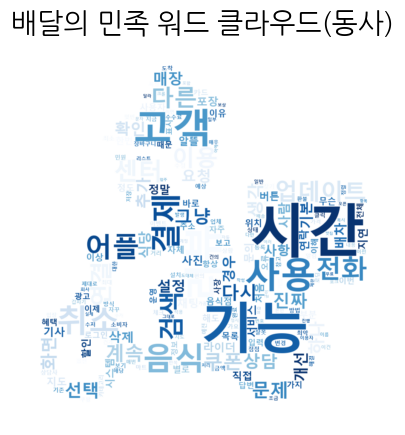

In [87]:
from wordcloud import WordCloud
import koreanize_matplotlib

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# 마스크 만들기
icon = Image.open('Images/badal2.png')    # 마스크가 될 이미지 불러오기 

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(
font_path='C:\\Windows\\Fonts\\malgunbd.ttf', # 한글 폰트 경로 (없으면 깨짐)
background_color="#FFFFFF",
colormap="Blues", # "gist_gray"
width=800,
height=400,
mask=mask,
)

wc.generate_from_frequencies(word_count_max)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("배달의 민족 워드 클라우드(동사)", fontsize=20)
plt.show()

### 검색

명사들을 추출한 워드클라우드를 생성했다면, 그 명사가 포함된 문장을 어떻게 검색할 수 있을까?

In [88]:
keyword = "취소"

extract_data = data.loc[data["댓글"].str.contains(keyword),:]
extract_data.head()

for review in extract_data["댓글"]:
    print(review)
    print()

80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못했다고만 로딩반복. 로딩 이미지는 깨져서 나오고 안정적인 네트워크 상황 하에서 새로고침을 눌러도 무한로딩이고 심지어 지금 진행중인 주문내역 정보조차 정확하지 않음. 코로나 때문에 서버가 불안정한건지 뭔지는 모르겠으나 결국엔 취소 못하고 꼼짝없이 기다려 먹게됐네요.

편의점 꺼 30분을 기다렸는데 갑자기 기타 사유로 주문이 취소가 됐어요. 평소에 워낙 친절한 매장이라 이게 무슨 일이지 하고 전화를 걸어보려 했는데 그 매장이 아니라 편의점 고객센터로 연결되네요? 심지어 주말이라 고객센터는 받지도 않고..ㅠㅠㅠ 계속 기다렸는데.. 곧 나가야 해서 이제 와서 다른 걸 시킬 수도 없고요 바쁠 수도 있고 재고가 없을 수도 있는 거 다 이해하고 평소에 친절하게 대응했던 매장이라 엄청 화는 안 나요 다만 오래 기다렸으니까 취소할 때는 왜 안되는지 정확한 사유를 말해주셨으면 좋겠어요 그리고 편의점에서 부족한 게 있을 때 부분 취소는 안되는 걸까요? 안된다면 이런 점도 개선됐으면 좋겠어요 그래야 서로 편할거같아요

응대수준 심각하네요. 문의량이 많다는 이유로 접수도 못하게하나? 예정시간에 도착을 안하면 적어도 취소라도 하게 해야죠. 전화도 안되고 채팅도 안되면 이런 문제상황이 발생했을때 어떻게 대처하려고 그러시나 배민 수준 점점 떨어지는게 보이네요. 앞으로는 이용 안할 생각입니다

최악의 어플. 배민원 배달지연 너무되서 취소하려고 하는데 취소는 고객센터 연결이 필요. 고객센터 연결 절대안되고 그냥 고객은 환불도 못받고 무작정 기다려야 함. 주문한 가게에서는 환불하려면 고객이 직접 고객센터 연결해야한다고만 하고.. 그래서 배달시켰는데 제가 포장하는것마냥 직접 걸어갔다왔습니다^^ 할인쿠폰 준다고 절대 사용하지 마세요^^

최근 배달이 안 되는 일이 발생하는게 너무 스트레스가 크네요... 배민 원에서 시키고 알뜰 배달로도 시켜봐도 이런 일이 가끔 발생하는거 보면 특정 시스템이 아니라 배민 자체의 문제 

## + Kiwi 자연어처리 체험

In [89]:
from kiwipiepy import Kiwi

kiwi = Kiwi()

text = "분명 배달 완료라고 떴는데, 음식이 도착하지 않았네요..."

for res, score in kiwi.analyze(text, top_n = 5):
    print(score, res, sep="\t")

-101.43404388427734	[Token(form='분명', tag='MAG', start=0, len=2), Token(form='배달', tag='NNG', start=3, len=2), Token(form='완료', tag='NNG', start=6, len=2), Token(form='이', tag='VCP', start=8, len=0), Token(form='라고', tag='EC', start=8, len=2), Token(form='뜨', tag='VV', start=11, len=1), Token(form='었', tag='EP', start=11, len=1), Token(form='는데', tag='EC', start=12, len=2), Token(form=',', tag='SP', start=14, len=1), Token(form='음식', tag='NNG', start=16, len=2), Token(form='이', tag='JKS', start=18, len=1), Token(form='도착', tag='NNG', start=20, len=2), Token(form='하', tag='XSV', start=22, len=1), Token(form='지', tag='EC', start=23, len=1), Token(form='않', tag='VX', start=25, len=1), Token(form='었', tag='EP', start=26, len=1), Token(form='네요', tag='EF', start=27, len=2), Token(form='...', tag='SF', start=29, len=3)]
-103.17688751220703	[Token(form='분명', tag='MAG', start=0, len=2), Token(form='배달', tag='NNG', start=3, len=2), Token(form='완료', tag='NNG', start=6, len=2), Token(form='이', ta

In [90]:
text = "한강공원에서 치킨을 두 마리 시켰어요. 분명 배달 완료라고 떴는데, " \
"음식이 도착하지 않았어요... 어디계시죠? 이거 하나 제대로 못하시면 장사하지 마세요!!!!"

result = kiwi.tokenize(text)
for res in result:
    if res.tag.startswith("N"):
        print(res.form, res.tag)

한강공원 NNP
치킨 NNG
마리 NNB
배달 NNG
완료 NNG
음식 NNG
도착 NNG
어디 NP
이거 NP
하나 NR
장사 NNG


In [91]:
text = "촛불 나뭇잎 rosa99kim@naver.com @kim"

result = kiwi.tokenize(text)

for re in result:
    print(re)

Token(form='촛불', tag='NNG', start=0, len=2)
Token(form='나뭇잎', tag='NNG', start=3, len=3)
Token(form='rosa99kim@naver.com', tag='W_EMAIL', start=7, len=19)
Token(form='@kim', tag='W_MENTION', start=27, len=4)


## 3. 긍부정 분석

### 1) 데이터 불러오기

In [92]:
import pandas as pd
import numpy as np

data = pd.read_csv("data/appreply2.csv", index_col=0)
data.head()

,text,score
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3


In [93]:
data["reaction"] = np.where(data["score"] >= 4, 1, 0)
data.head()

,text,score,reaction
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4,1
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5,1
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1,0
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2,0
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3,0


### 2) 데이터 탐색

In [94]:
data["reaction"].value_counts()

reaction
0    729
1    271
Name: count, dtype: int64

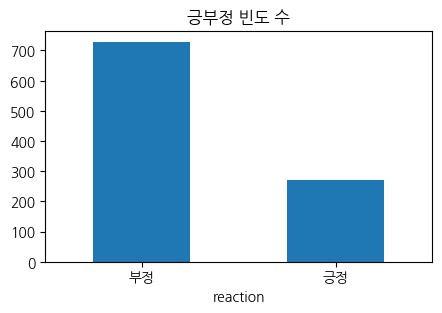

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

plt.figure(figsize=(5,3))
data["reaction"].value_counts().plot(kind="bar")
plt.title("긍부정 빈도 수")
plt.xticks(ticks=[0, 1], labels=["부정", "긍정"], rotation=0)
plt.show()

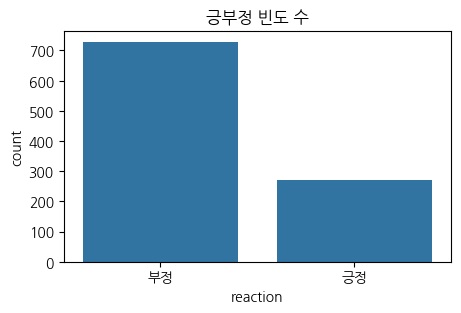

In [96]:
plt.figure(figsize=(5,3))
sns.countplot(data=data, x="reaction")
plt.title("긍부정 빈도 수")
plt.xticks(ticks=[0, 1], labels=["부정", "긍정"], rotation=0)
plt.show()

In [97]:
# reaction==1인 데이터 data_pos
data_pos = data[data["reaction"] == 1]
# reaction==0인 데이터 data_neg
data_neg = data[data["reaction"] == 0]

### 3) 데이터 전처리

In [98]:
import re
from konlpy.tag import Okt # 트위터

okt = Okt()

def get_word_list(data, stopwords):
    """리뷰 데이터프레임과 불용어 리스트를 입력하면 word_list를 반환해주는 함수"""
    word_list = []
    
    for i, review in enumerate(data["text"].tolist()):
        # STEP1: 데이터 전처리
        new_review = re.sub("[^a-zA-Z가-힣\\s]", "", review)
        # STEP2: 형태소 분석
        result = okt.nouns(new_review)
        # STEP3: 조건에 맞는 단어 담기
        for word in result:
            if len(word) > 1 and word not in stopwords:
                word_list.append(word)
        ### 출력 메세지 ###
        # print(f"{i}번째 리뷰: {new_review}")
    return word_list

In [99]:
stopwords = ["배민", "민족"]

word_list_pos = get_word_list(data_pos, stopwords)

### 4) 워드 클라우드

In [100]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import koreanize_matplotlib
from PIL import Image 
import numpy as np 
from collections import Counter

def draw_wordcloud(word_list):
    """word_list를 받으면 Counter로 빈도 수를 센 후 워드 클라우드를 그리고 counter를 반환하는 함수"""
    counter = Counter(word_list)
    # print(counter)
    # print(counter.most_common(30))

    ## (한번 해보기) Mask로 내가 원하는 모양으로 만들어보기
    image = Image.open("Images/image.png")
    mask_img = np.array(image)

    wc = WordCloud(
        font_path = "C:\Windodws\Fonts\malgun.ttf",
        mask=mask_img,
        background_color="white",
        width=800,
        height=400
    )

    ## (한번 해보기) 가장 많이 발생한 50개만 워드 클라우드로 그려보기
    wc.generate_from_frequencies(counter)

    plt.figure(figsize=(5,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("배달의 민족 워드 클라우드(단어)", fontsize=15)
    plt.show()

    return counter

<>:19: SyntaxWarning: invalid escape sequence '\W'
<>:19: SyntaxWarning: invalid escape sequence '\W'
C:\Users\user\AppData\Local\Temp\ipykernel_9784\3490093355.py:19: SyntaxWarning: invalid escape sequence '\W'
  font_path = "C:\Windodws\Fonts\malgun.ttf",


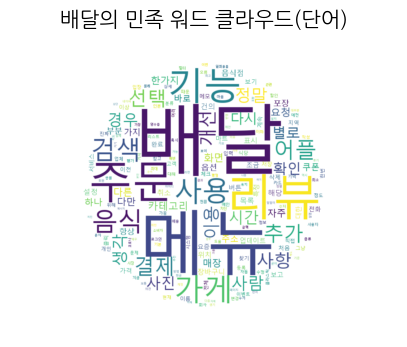

Counter({'배달': 232, '메뉴': 188, '리뷰': 179, '주문': 147, '기능': 127, '가게': 127, '사용': 112, '음식': 91, '검색': 88, '어플': 64, '결제': 58, '추가': 53, '선택': 49, '개선': 46, '사항': 42, '이용': 39, '사람': 38, '정말': 38, '생각': 37, '경우': 33, '시간': 32, '사진': 31, '확인': 28, '별로': 28, '다시': 27, '카테고리': 27, '요청': 27, '화면': 25, '다른': 25, '자주': 24, '한가지': 24, '다만': 24, '매장': 24, '하나': 23, '주소': 22, '쿠폰': 22, '바로': 22, '가지': 21, '포장': 20, '옵션': 20, '부분': 20, '항상': 19, '음식점': 19, '건의': 18, '목록': 18, '설정': 18, '해당': 18, '표시': 17, '위치': 17, '장바구니': 17, '취소': 17, '특정': 16, '조금': 16, '업데이트': 16, '대한': 16, '보고': 16, '버튼': 16, '보기': 15, '가격': 15, '전화': 15, '완료': 15, '요즘': 15, '서비스': 15, '마트': 15, '삭제': 14, '처음': 14, '계속': 14, '이전': 14, '저장': 13, '이상': 13, '이름': 13, '메모': 13, '클릭': 13, '지역': 13, '찾기': 12, '입력': 12, '그냥': 12, '개인': 12, '식당': 12, '직접': 12, '고객': 12, '한번': 12, '체크': 12, '전체': 12, '정도': 11, '시스템': 11, '이벤트': 11, '입장': 11, '업체': 11, '등록': 11, '진짜': 11, '참고': 10, '위해': 10, '때문': 10, '분류': 10, '여러': 10, '문제': 10, '현재

In [101]:
result = draw_wordcloud(word_list_pos)
print(result)

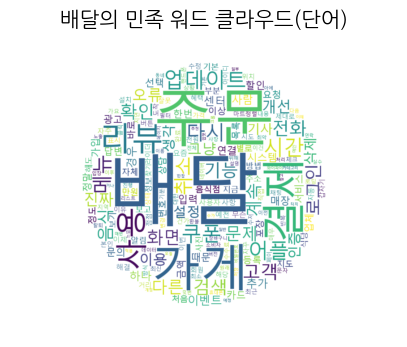

In [102]:
word_list_neg = get_word_list(data_neg, stopwords)
result = draw_wordcloud(word_list_neg)

#### + 함수 응용 (most common 반영)

In [103]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib
from PIL import Image
import numpy as np
from collections import Counter

def draw_wordcloud_mostcommon(word_list):
    """word_list를 받으면 Counter로 빈도 수를 센 후 워드 클라우드를 그리고 counter를 반환하는 함수"""
    counter = Counter(word_list)
    # print(counter)
    # print(counter.most_common(30))

    ## (한번 해보기) Mask로 내가 원하는 모양으로 만들어보기
    image = Image.open("resources/circle.png")
    mask_img = np.array(image)

    wc = WordCloud(
        font_path = "C:\Windodws\Fonts\malgun.ttf",
        mask=mask_img,
        background_color="white",
        width=800,
        height=400
    )

    ## (한번 해보기) 가장 많이 발생한 50개만 워드 클라우드로 그려보기
    wc.generate_from_frequencies(counter)

    plt.figure(figsize=(5,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("배달의 민족 워드 클라우드(단어)", fontsize=15)
    plt.show()

    return counter

<>:19: SyntaxWarning: invalid escape sequence '\W'
<>:19: SyntaxWarning: invalid escape sequence '\W'
C:\Users\user\AppData\Local\Temp\ipykernel_9784\3200097509.py:19: SyntaxWarning: invalid escape sequence '\W'
  font_path = "C:\Windodws\Fonts\malgun.ttf",


## 4. 장바구니 분석

### 1) 데이터 불러오기

In [104]:
data = pd.read_csv("data/appreply2.csv", index_col=0)
data.head()

,text,score
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3


### 2) 데이터 전처기

In [105]:
# word_list = [리뷰1 단어1, 리뷰1 단어2, 리뷰2 단어1, 리뷰2 단어2, 리뷰2 단어3 ......]

In [106]:
# main_list = [[리뷰1 단어1 리뷰1 단어2], [리뷰2 단어1, 리뷰2 단어2, 리뷰3 단어3], ....]

In [107]:
main_list = []
stopwords = ["배민", "민족"]

for i, review in enumerate(data["text"].tolist()):
    # STEP1: 데이터 전처리
    new_review = re.sub("[^a-zA-Z가-힣\\s]", "", review)
    # STEP2: 형태소 분석
    result = okt.nouns(new_review)
    # STEP3: 조건에 맞는 단어 담기
    sub_list = []
    for word in result:
        if len(word) > 1 and word not in stopwords:
            sub_list.append(word)
    main_list.append(sub_list)
    ### 출력 메세지 ###
    # print(f"{i}번째 리뷰: {new_review}")
print(main_list)

[['배달', '주문', '리뷰', '자주', '참고', '편입', '한가지', '건의', '사항', '최신', '점순', '주문', '자하', '메뉴', '메뉴', '리뷰', '확인', '기능', '메뉴', '검색', '기능', '리뷰', '특정', '메뉴', '검색', '기능', '주문', '수가', '메뉴', '리뷰', '보기', '위해', '래그', '시간', '소요', '효율', '발생', '긍정', '검토', '주심'], ['주문', '과거', '목록', '검색', '기능', '분명', '가게', '기억', '찾기', '메뉴', '검색', '곱창', '치면', '과거', '곱창', '목록', '가게', '리뷰', '리뷰', '보기'], ['검색', '화면', '전체', '배달', '포장', '배달', '크롤', '아래', '크롤', '자꾸만', '왼쪽', '오른쪽', '전체', '포장', '정말', '검색', '배달', '포장', '마트', '하나', '선택', '좌우', '가끔', '크롤', '왼쪽', '전체', '가게'], ['배달', '정렬', '가게', '가장', '위로', '지역', '추가', '배달', '별도', '체크', '배달', '만원', '이상', '배달', '장난', '하나', '하나', '가격', '대별', '금액', '체크', '배달', '별도', '확인'], ['최근', '업데이트', '안드로이드', '사양', '정도', '어플', '실행', '업데이트', '하라', '업데이트', '업데이트', '진행', '열기', '열기', '업데이트', '무한', '반복', '삭제', '설치', '환경설정', '증상', '다른', '증상', '이번', '업데이트', '관련', '파일', '확인', '참고', '사양', '핸드폰', '사양', '문제', '이번', '업데이트'], ['매장', '구분', '대체', '언제', '이면', '개선', '독점', '해이', '건가', '결제', '관련', '부분', '정말', '별로', '구성',

In [108]:
print(main_list)

[['배달', '주문', '리뷰', '자주', '참고', '편입', '한가지', '건의', '사항', '최신', '점순', '주문', '자하', '메뉴', '메뉴', '리뷰', '확인', '기능', '메뉴', '검색', '기능', '리뷰', '특정', '메뉴', '검색', '기능', '주문', '수가', '메뉴', '리뷰', '보기', '위해', '래그', '시간', '소요', '효율', '발생', '긍정', '검토', '주심'], ['주문', '과거', '목록', '검색', '기능', '분명', '가게', '기억', '찾기', '메뉴', '검색', '곱창', '치면', '과거', '곱창', '목록', '가게', '리뷰', '리뷰', '보기'], ['검색', '화면', '전체', '배달', '포장', '배달', '크롤', '아래', '크롤', '자꾸만', '왼쪽', '오른쪽', '전체', '포장', '정말', '검색', '배달', '포장', '마트', '하나', '선택', '좌우', '가끔', '크롤', '왼쪽', '전체', '가게'], ['배달', '정렬', '가게', '가장', '위로', '지역', '추가', '배달', '별도', '체크', '배달', '만원', '이상', '배달', '장난', '하나', '하나', '가격', '대별', '금액', '체크', '배달', '별도', '확인'], ['최근', '업데이트', '안드로이드', '사양', '정도', '어플', '실행', '업데이트', '하라', '업데이트', '업데이트', '진행', '열기', '열기', '업데이트', '무한', '반복', '삭제', '설치', '환경설정', '증상', '다른', '증상', '이번', '업데이트', '관련', '파일', '확인', '참고', '사양', '핸드폰', '사양', '문제', '이번', '업데이트'], ['매장', '구분', '대체', '언제', '이면', '개선', '독점', '해이', '건가', '결제', '관련', '부분', '정말', '별로', '구성',

### 3) 연관성 분석

In [109]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_arr = te.fit(main_list).transform(main_list)
df = pd.DataFrame(te_arr, columns=te.columns_)
df.head()

,가게,가격,가계,가공,가관,가구,가기,가까스로,가까윤,가까이,...,휴대전화,휴대폰,휴대폰결제,휴먼,휴면,휴업,흐릿,희망,흰색,히어로
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [110]:
frequent_itemset = apriori(df, min_support=0.05, use_colnames=True, max_len=2)
frequent_itemset.sort_values(ascending=False, by="support")

,support,itemsets
17,0.439,(배달)
39,0.311,(주문)
0,0.208,(가게)
20,0.207,(사용)
13,0.194,(리뷰)
...,...,...
26,0.051,(센터)
54,0.050,"(고객, 센터)"
69,0.050,"(배달, 전화)"
72,0.050,"(어플, 사용)"


- support: $P(A\cap B)$  
    - A와 B가 동시에 발생할 확률
- confidence : $P(B|A)$  
    - A가 발생할때 B가 발생할 확률
- lift : $P(B|A)/P(B)$   
    - 이 값은 $P(B|A)$ 가 $P(B)$ 에 비해 얼마나 더 크거나 작은지를 나타냅니다
    - 만약 이 값이 1보다 크다면, A가 발생했을 때 B가 발생할 확률이 B가 발생할 확률보다 더 높다는 의미
    - 반대로 1보다 작다면, A가 발생했을 때 B가 발생할 확률이 B가 발생할 확률보다 더 낮다는 의미의미

In [111]:
rules = association_rules(frequent_itemset, metric="confidence", min_threshold=0.4)
rules[["antecedents", "consequents", "support", "confidence", "lift"]]

# antecedents : A, consequents: B

,antecedents,consequents,support,confidence,lift
0,(가게),(배달),0.109,0.524038,1.193709
1,(가게),(주문),0.086,0.413462,1.329458
2,(결제),(주문),0.052,0.448276,1.441401
3,(고객),(센터),0.050,0.543478,10.656436
4,(센터),(고객),0.050,0.980392,10.656436
5,(기능),(배달),0.074,0.448485,1.021606
6,(기능),(주문),0.069,0.418182,1.344636
7,(다른),(배달),0.055,0.539216,1.228282
8,(메뉴),(리뷰),0.087,0.486034,2.505327
9,(리뷰),(메뉴),0.087,0.448454,2.505327


### 4) 시각화

In [112]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import koreanize_matplotlib 

rules["antecedents_str"] = rules["antecedents"].apply(lambda x: ",".join(sorted(list(x))))
rules["consequents_str"] = rules["consequents"].apply(lambda x: ",".join(sorted(list(x))))

rules[["antecedents_str", "consequents_str", "support", "confidence", "lift"]]

,antecedents_str,consequents_str,support,confidence,lift
0,가게,배달,0.109,0.524038,1.193709
1,가게,주문,0.086,0.413462,1.329458
2,결제,주문,0.052,0.448276,1.441401
3,고객,센터,0.050,0.543478,10.656436
4,센터,고객,0.050,0.980392,10.656436
5,기능,배달,0.074,0.448485,1.021606
6,기능,주문,0.069,0.418182,1.344636
7,다른,배달,0.055,0.539216,1.228282
8,메뉴,리뷰,0.087,0.486034,2.505327
9,리뷰,메뉴,0.087,0.448454,2.505327


In [113]:
pivot_data = rules.pivot_table(
    index="antecedents_str",
    columns="consequents_str",
    values="confidence",
    fill_value=0
)
pivot_data

consequents_str,고객,리뷰,메뉴,배달,센터,주문
antecedents_str,,,,,,
가게,0.000000,0.000000,0.000000,0.524038,0.000000,0.413462
결제,0.000000,0.000000,0.000000,0.000000,0.000000,0.448276
고객,0.000000,0.000000,0.000000,0.000000,0.543478,0.000000
기능,0.000000,0.000000,0.000000,0.448485,0.000000,0.418182
다른,0.000000,0.000000,0.000000,0.539216,0.000000,0.000000
리뷰,0.000000,0.000000,0.448454,0.427835,0.000000,0.000000
메뉴,0.000000,0.486034,0.000000,0.000000,0.000000,0.000000
사용,0.000000,0.000000,0.000000,0.478261,0.000000,0.000000
센터,0.980392,0.000000,0.000000,0.000000,0.000000,0.000000


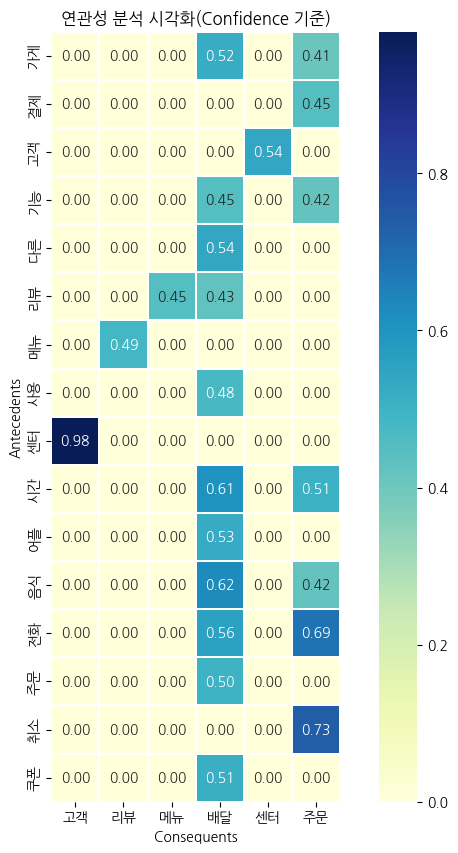

In [114]:
plt.figure(figsize=(10,10))
sns.heatmap(pivot_data, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.3, square=True)
plt.title("연관성 분석 시각화(Confidence 기준)")
plt.xlabel("Consequents")
plt.ylabel("Antecedents")
plt.show()

## 5. 네트워크 분석

```uv add networkx```

In [115]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedents_str,consequents_str
0,(가게),(배달),0.208,0.439,0.109,0.524038,1.193709,1.0,0.017688,1.178667,0.204893,0.202602,0.151584,0.386165,가게,배달
1,(가게),(주문),0.208,0.311,0.086,0.413462,1.329458,1.0,0.021312,1.174689,0.312896,0.198614,0.148711,0.344994,가게,주문
2,(결제),(주문),0.116,0.311,0.052,0.448276,1.441401,1.0,0.015924,1.248813,0.346415,0.138667,0.199239,0.307739,결제,주문
3,(고객),(센터),0.092,0.051,0.050,0.543478,10.656436,1.0,0.045308,2.078762,0.997974,0.537634,0.518944,0.761935,고객,센터
4,(센터),(고객),0.051,0.092,0.050,0.980392,10.656436,1.0,0.045308,46.308000,0.954858,0.537634,0.978405,0.761935,센터,고객


In [116]:
import networkx as nx
import matplotlib.pyplot as plt 
import koreanize_matplotlib 

# 1. 그래프 생성
G = nx.Graph()

# 2. 엣지 추가
for _, row in rules.iterrows():
    # 단어 추출
    antecedent = ",".join(row["antecedents"])
    consequent = ",".join(row["consequents"])
    weight = row["confidence"]

    # 노드 추가
    G.add_edge(antecedent, consequent, weight=weight)

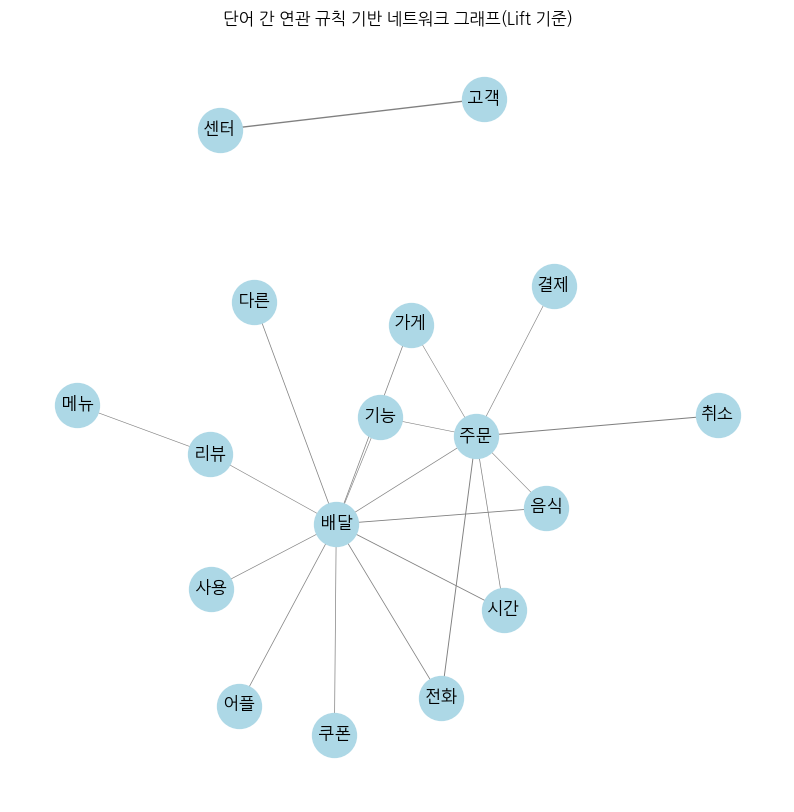

In [117]:
# 3. 노드 배치
pos = nx.kamada_kawai_layout(G)

# 4. 가중치 추출 
edge_weights = [G[u][v]["weight"] for u, v in G.edges()]

# 5. 노드 스타일 지정 및 그리기
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=1000)
nx.draw_networkx_edges(G, pos, edge_color="gray", width=edge_weights)
nx.draw_networkx_labels(G, pos, font_size=12, font_family="Malgun Gothic")

# edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("단어 간 연관 규칙 기반 네트워크 그래프(Lift 기준)")
plt.axis("off")
plt.show()

## 6. 인코딩/벡터라이징

### 1) 인코딩

#### 정수 인코딩

```uv add scikit-learn```

In [118]:
sentences = [
    "나는 오늘 기분이 좋다",
    "오늘 날씨가 좋다",
    "나는 기분이 나쁘다"
]

In [119]:
# sentences를 스페이스 기준으로 쪼갠다.
# 그 단어들의 집합을 만든다.
tokens = []

for sent in sentences:
    temp = sent.split()
    tokens.extend(temp)

print(tokens)
token_set = set(tokens)
print(token_set)

['나는', '오늘', '기분이', '좋다', '오늘', '날씨가', '좋다', '나는', '기분이', '나쁘다']
{'나는', '날씨가', '기분이', '오늘', '나쁘다', '좋다'}


In [120]:
from sklearn.preprocessing import LabelEncoder

print(f"입력값: {list(token_set)}")
label_encoder = LabelEncoder()
encoded = label_encoder.fit_transform(list(token_set))
print(f"출력값: {encoded}")
print(f"어떤 기준인가요? {label_encoder.classes_}")

입력값: ['나는', '날씨가', '기분이', '오늘', '나쁘다', '좋다']
출력값: [1 3 0 4 2 5]
어떤 기준인가요? ['기분이' '나는' '나쁘다' '날씨가' '오늘' '좋다']


In [121]:
mydict = {}
for i, key in enumerate(label_encoder.classes_):
    mydict[str(key)] = i

mydict

{'기분이': 0, '나는': 1, '나쁘다': 2, '날씨가': 3, '오늘': 4, '좋다': 5}

In [122]:
label_encoder.transform(["나는", "기분이", "나쁘다"])

array([1, 0, 2])

#### 원-핫 인코딩

In [123]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

tokens_numpy = np.array(list(token_set))
print(tokens_numpy)

tokens_arr = tokens_numpy.reshape(-1, 1)
print(tokens_arr)

oh_encoder = OneHotEncoder()
encoded = oh_encoder.fit_transform(tokens_arr)
print(encoded.toarray())

['나는' '날씨가' '기분이' '오늘' '나쁘다' '좋다']
[['나는']
 ['날씨가']
 ['기분이']
 ['오늘']
 ['나쁘다']
 ['좋다']]
[[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [ ]:
oh_encoder.categories_

[array(['기분이', '나는', '나쁘다', '날씨가', '오늘', '좋다'], dtype='<U3')]

### 2) 벡터라이징

#### BoW(Bag of Words)

In [125]:
sentences

['나는 오늘 기분이 좋다', '오늘 날씨가 좋다', '나는 기분이 나쁘다']

In [141]:
# 미션: 딕셔너리 만들기(단어: 빈도, 형태의 딕셔너리 만들기)
my_dict = {}
for sent in sentences:
    print(sent.split())

    for word in sent.split():
        if word in my_dict:
            my_dict[word] += 1
        else :
            my_dict[word] = 1

print(my_dict)

['나는', '오늘', '기분이', '좋다']
['오늘', '날씨가', '좋다']
['나는', '기분이', '나쁘다']
{'나는': 2, '오늘': 2, '기분이': 2, '좋다': 2, '날씨가': 1, '나쁘다': 1}


In [142]:
from sklearn.feature_extraction.text import CountVectorizer 

vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(sentences)
print(vectorizer.vocabulary_)
print(bow_matrix.toarray())

{'나는': 1, '오늘': 4, '기분이': 0, '좋다': 5, '날씨가': 3, '나쁘다': 2}
[[1 1 0 0 1 1]
 [0 0 0 1 1 1]
 [1 1 1 0 0 0]]


# === History ===

## 장바구니 분석

연관 규칙 분석(Association Rule Analysis)

In [128]:
data = pd.read_csv("data/배달의민족댓글_정제.csv", index_col=0)
data.head()

,댓글
0,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
1,음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...
2,왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 ...
3,"배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는..."
4,장바구니가 너무 불편합니다. 비마트에서 여러가지를 담고 스크롤 올리고 내릴때 살짝 ...


In [129]:
# 댓글을 반복문으로 하나씩 추출
# 전처리 과정 그대로
# 댓글 형태소 분석
# 빈 리스트 만들기 sub_list
# 반복문으로 형태소 명사 단어들 담기
# sub_list에 명사 단어들 담기
# main_list에 sub_list 담기

import re

tokenized_sentences = []
for review in data["댓글"]:
    new_review = re.sub("[^0-9a-zA-Z가-힣\\s]", "", review)
    
    result = kiwi.tokenize(new_review)

    temp_list = []
    for res in result:
        if len(res.form) <= 1:
            continue
        
        if res.tag.startswith("N"):
            temp_list.append(res.form)
        
    tokenized_sentences.append(temp_list)


`uv add mlxtend`

In [130]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
# 1. TransactionEncoder를 사용해 one-hot 인코딩
te = TransactionEncoder()
te_ary = te.fit(tokenized_sentences).transform(tokenized_sentences)
df = pd.DataFrame(te_ary, columns=te.columns_)

df

,B마트배민,가게,가격,가계,가계도,가계부,가능,가독성,가맹점,가시,...,횟수,횡포,효율,후기,후식,휴가,휴대폰,휴무,휴일,희망
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
458,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [131]:
# 2. 자주 등장하는 항목 집합 추출 (min_support 조절 가능)
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
# 3. 연관 규칙 생성
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

### + 간단한 예제로 보기

In [132]:
main_list = [
    ["밥", "국", "김치"],
    ["밥", "국"],
    ["밥", "김치"],
    ["라면", "김치"],
    ["밥", "반찬"],
    ["국", "김치"]
]

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder 
from mlxtend.frequent_patterns import apriori, association_rules 

te = TransactionEncoder()
te_arr = te.fit(main_list).transform(main_list)
df = pd.DataFrame(te_arr, columns=te.columns_)
df

,국,김치,라면,반찬,밥
0,True,True,False,False,True
1,True,False,False,False,True
2,False,True,False,False,True
3,False,True,True,False,False
4,False,False,False,True,True
5,True,True,False,False,False


In [133]:
# 2. 자주 등장하는 항목 집합 추출 (min_support 조절 가능)
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.500000,(국)
1,0.666667,(김치)
2,0.666667,(밥)
3,0.333333,"(김치, 국)"
4,0.333333,"(밥, 국)"
5,0.333333,"(김치, 밥)"


In [134]:
# 3. 연관 규칙 생성
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(김치),(국),0.666667,0.500000,0.333333,0.500000,1.0,1.0,0.0,1.0,0.0,0.4,0.0,0.583333
1,(국),(김치),0.500000,0.666667,0.333333,0.666667,1.0,1.0,0.0,1.0,0.0,0.4,0.0,0.583333
2,(밥),(국),0.666667,0.500000,0.333333,0.500000,1.0,1.0,0.0,1.0,0.0,0.4,0.0,0.583333
3,(국),(밥),0.500000,0.666667,0.333333,0.666667,1.0,1.0,0.0,1.0,0.0,0.4,0.0,0.583333


- 인코딩 : 텍스트에 숫자를 부여하는 것, 숫자에 의미가 없다 (ex. one-hot 인코딩)
- 벡터라이징 : 숫자에 의미를 부여 (문맥에 대한 이해는 X) (ex. 숫자를 카운팅(빈도수))
- 임베딩 : 
    - 학습한 결과로 문맥에 대한 이해를 부여한다.
    - 벡터라이징만으로 드러나지 않는 연관관계 등을 학습을 통해 관계성을 만들어 낼 수 있다.
    - 비슷한 문장은 벡터를 비슷하게 만들어 준다.

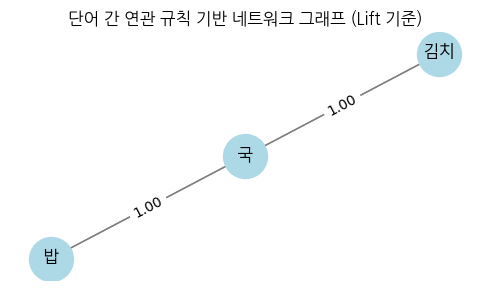

In [135]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. 그래프 객체 생성
G = nx.DiGraph() # 방향 있는 그래프 (A → B)

# 2. 엣지 추가
for _, row in rules.iterrows():
    # 단어 추출 (frozenset → str)
    antecedent = ','.join(row['antecedents'])

    consequent = ','.join(row['consequents'])
    weight = row['lift'] # 또는 row['confidence']

    # 엣지 추가 (노드 간 연결 + 가중치 포함)
    G.add_edge(antecedent, consequent, weight=weight)

# 노드 위치 자동 배치
pos = nx.spring_layout(G, seed=42) # seed 고정으로 레이아웃 재현 가능

# 엣지 가중치 추출
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# 노드 스타일 지정
plt.figure(figsize=(5, 3))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000)

nx.draw_networkx_edges(G, pos, edge_color='gray', width=edge_weights)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='Malgun Gothic')

# 엣지 라벨 (lift 값)
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("단어 간 연관 규칙 기반 네트워크 그래프 (Lift 기준)")
plt.axis('off')
plt.tight_layout()
plt.show()

## 프로젝트 실습

In [136]:
import io

f = open("data\제로페이_구글_리뷰.txt", 'r', encoding="utf-8")
lines = f.readlines()

for li in lines:
    print(li)

1. 몇일 전부터 결제알림이 오질 않아요. 불안한건 앱실행 후 결제 내역에도 나오지 않습니다. 왜 이런가요? 손님 폰에는 결제내역이 뜨는데 가맹점 앱에선 확인 할 방법이 없어서 불안합니다. 빠른 조치 부탁드릴께요

2. 진짜 최악최악 앱입니다 소비자가 결제를 하면 알림도 오지 않고 앱을 열어 실행할라치면 아예 화면이 넘어가질 않습니다. 예전 앱이 훨씬 편하고 로긴도 잘 됬었는데 이게 뭐랍니까? 매출 확인을 통장에 들어오는 알림으로 확인해야되다니요! 진짜 개선이 시급한 사항 입니다. 많은 이용자들이 불편을 얘기하면 뭔가가 개선이 되어야되는데 이건 똑같은 불편이 여전하네요! 빨리 시정해 주세요!

3. 큐알키트 분실해서 신청할려했더니 메뉴만 들어가면 접속이 끊켜요. 상담원 통화했더니 제 폰이 문제있다하고 통화도중 툭 끊기는건 또 뭡니까? 근데 웃긴건 통화후 메뉴 접속 딱한번 안끊켜서 그때 키트신청했음요. 그러곤 지금까지도 접속 끊껴요. 이 결제시스템을 원한것도 아니고 안쓸수도 없고 알림도 늦게 올때 있고 불편해서 못쓰겠어요

4. 간편 비밀번호 6자리 입력을 할 수가 없습니다, 전 리뷰 답장을 보니 문구 밑 회색 동그라미 누르면 자판이 활성화 된다는데 그런 아이콘이 뜨지가 않습니다, 문의해달라는 멘트 말고 의견수렴해서 업데이트를 해주셔야지 왜 이렇게 일 처리를 하는지 모르겠네요 이전 앱으로 사용가능하게 해주세요 어플이 이래서 제로페이 사용하는 손님들 못받고 있습니다 . 책임감 가지고 빠른 해결기다리겠습니다.

5. 웹에서 결제내역과 결제내역 다운로드에 환불 항목은 어느 결제의 환불인지 나타나지 않아 환불 대상 식별이 안 됩니다. 반드시 수정 되었으면 좋겠습니다. 웹과 앱 모두 너무 느린 문제, 스크롤 잘 안 되는 문제, 웹에서 결제내역 조회가 1개월밖에 안 되는 문제도 모두 해결되었으면 좋겠네요.

6. 별하나 어쩔수 없이 주는데 앱받고 재가입 해야한대서 하는데 며칠째 못하고있음! 휴대폰인증번호가 오지를 않음.. 와 진짜 이따위로 만든 앱은 처음 봅니다. 결제자 

In [137]:
# 배달의민족 댓글 "동사"에 대한 워드 클라우드
# norm, stem 옵션 이용
# 명사에서 진행한 정규표현식, 1글자는 제외 조건은 동일
# gpt이용해서 새로운 마스크 만들어보고 적용해보기

import re

word_list = []
stopwords = ["어플", "결제", "제로", "페이","알림", "확인", "비번", "변경", "로그인", "진짜"]
okt = Okt()

for line in lines:
    new_line = re.sub("[^0-9a-zA-Z가-힣]", "", line)
    result = okt.pos(new_line, stem=True, norm=True)

    for word, pos in result:
        if word in stopwords:
            continue

        if len(word) > 1 and pos == "Noun":
            word_list.append(word)

print(word_list)

['일전', '실행', '손님', '가맹', '점앱', '방법', '조치', '최악', '최악', '소비자', '오지', '실행', '치면', '아예', '예전', '매출', '통장', '개선', '사항', '이용자', '불편', '얘기', '가가', '개선', '불편', '시정', '큐알', '키트', '신청', '메뉴', '접속', '상담', '원통', '제폰', '문제', '통화', '도중', '또뭡', '통화', '메뉴', '접속', '번안', '그때', '키트', '신청', '지금', '접속', '시스템', '간편', '비밀번호', '자리', '입력', '리뷰', '답장', '문구', '회색', '동그라미', '판이', '활성화', '아이콘', '문의', '멘트', '의견', '수렴', '업데이트', '게일', '처리', '이전', '사용', '사용', '손님', '책임감', '가지', '해결', '다운로드', '환불', '항목', '환불', '환불', '대상', '식별', '반드시', '수정', '모두', '제스', '크롤', '문제', '조회', '개월', '문제', '도모', '해결', '별하나', '고재', '가입', '며칠', '휴대폰', '인증', '번호', '오지', '로만', '처음', '메모', '활용', '메모', '해도', '한텐', '보이지', '세금', '정말', '최악', '도대체', '정부', '지원', '프로그램', '관리', '정도', '상식', '이해', '가안', '가요', '주소지', '상호', '상담', '신청', '상담', '연결', '하루', '몇통', '지도', '카톡', '상담', '래서', '며칠', '겨우', '겨우', '며칠', '통화', '이메일', '전화', '삼일', '다시', '이틀', '상담', '연결', '시스템', '문제', '로상호', '다라', '상호', '고객', '양해', '구한', '지역', '서지역', '상품권', '고객', '아예', '상담', '가까이', '홍보', '관리',

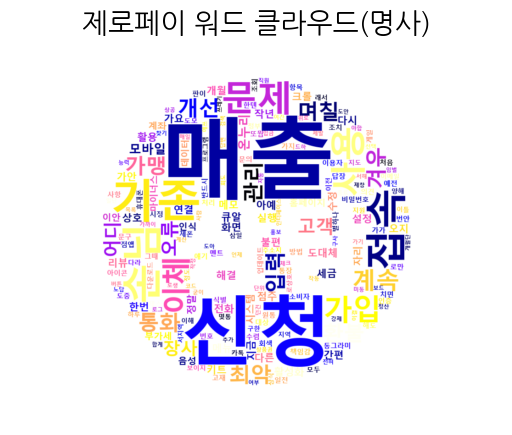

In [138]:
from wordcloud import WordCloud
import koreanize_matplotlib

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# 마스크 만들기
icon = Image.open('Images/image.png')    # 마스크가 될 이미지 불러오기 

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(
font_path='C:\\Windows\\Fonts\\malgunbd.ttf', # 한글 폰트 경로 (없으면 깨짐)
background_color="#FFFFFF",
colormap="gnuplot2", # "gist_gray"
width=1800,
height=1800,
mask=mask,
)

wc.generate_from_frequencies(Counter(word_list))

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("제로페이 워드 클라우드(명사)", fontsize=20)
plt.show()

In [139]:
keywords = ["매출"]
for keyword in keywords:
    print(keyword)
    for line in lines:
        if line.__contains__(keyword):
            print(line.strip())
    print()

매출
2. 진짜 최악최악 앱입니다 소비자가 결제를 하면 알림도 오지 않고 앱을 열어 실행할라치면 아예 화면이 넘어가질 않습니다. 예전 앱이 훨씬 편하고 로긴도 잘 됬었는데 이게 뭐랍니까? 매출 확인을 통장에 들어오는 알림으로 확인해야되다니요! 진짜 개선이 시급한 사항 입니다. 많은 이용자들이 불편을 얘기하면 뭔가가 개선이 되어야되는데 이건 똑같은 불편이 여전하네요! 빨리 시정해 주세요!
12. 리뷰같은거쓴적 단한번도없는데 거지같아서씀. 그전어플이 훨씬 좋음. 전에쓰던건 로그인창에서 가맹점주로그인, 직원로그인 선택할수있었는데 이어플은 일단 가맹점주로그인해서 설정을 바꿔서해야하는게 여간 귀찮은게 아님 매출합계도 안나오고 정말 노답 어플임 별한개도아까움
16. 도대체 로그인이 왜 안되는겁니까 비번누르기만하면 활성화를위해 재로그인하라는말만 반복하고 로그인은 안되고 다시회원가입부터하려니 이미 가입되있다하고 서울페이는 알림 뜨지도않고 매출 확인을 어떻게합니까 기존앱 잘쓰고있었는데 뭘 이렇게 복잡하게 이것저것 만들어가지고 로그인좀해서 매출관리좀할수있게해주세요 취소도 못하고 현금으로 돌려주고있습니다
20. 심각하네요. 부가세신고하려고 매출액 확인하려는데 한달 토탈금액이 안나와요. 하나씩 더하나요? 게다가 스크롤도 튕겨요. 내리면서 다시 올라가고.. 이게 뭐에요.장사하면서 시간도 없어죽겠는데... 나라 지원금이 남아돌아서 어플재정비한건가요? 개발비가 아까워요. ㅠ

